<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Unsupervised-Learning/machine_learning_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k-평균** 
###- 클러스터 중심, 엘보우 방법

## *시작하기 전에*
1. 이전 군집은 사과, 파인애플, 바나나, 사진임을 미리 알고 있었음
2. 진짜 비지도 학습에서는 사인에 어떤 과일이 들어있는지 모름
3. 어떻게 평균값을 구하지? → <font color= #F06E5E>k-평균(k-means) 군집</font> 알고리즘으로!

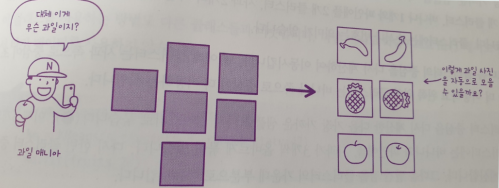

## **k-평균 알고리즘**
- k-평균 군집 알고리즘이 <font color=#ffeb2a>평균값을 자동</font>으로 계산
- 평균값이 <font color=#ffeb2a>클러스터의 중심</font>에 위치
- 동의어: <font color=#ffeb2a>클러스터 중심</font>(cluster center) 또는 <font color=#ffeb2a>센트로이드</font>(centroid)

[작동방식]
1. 무작위로 <font color= #F06E5E>k개의 클러스터 중심</font> 지정
2. 각 샘플에서 <font color= #F06E5E>가장 가까운 클러스터 중심</font>을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 <font color= #F06E5E>평균값</font>으로 클러스터 중심 변경
4. 클러스터 중심에 <font color= #F06E5E>변화가 없을 때까지</font> 2번으로 돌아가 반복

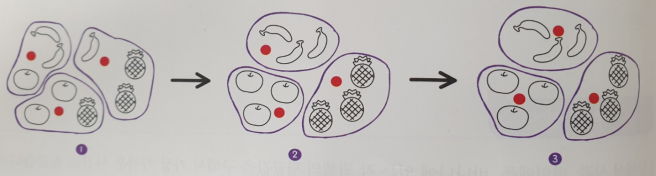

## **k-평균 알고리즘 작동방식 (k=3가점) 1단계**

1. 3개(k)의 클러스터 중심(빨간점)을 동일한 <font color=#ffeb2a>랜덤</font>하게 지점
2. 모든 샘플에 대해 <font color=#ffeb2a>동일한거리 계산</font>
3. <font color=#ffeb2a>동일한가장 가까운 샘플</font>을 본인의 클러스터로 묶음


> - 이해를 돕기위한 예제 그림이므로 하나의 클러스트당 3개의 샘플이
포함되었지만, <font color= #F06E5E>클러스트당 샘플 수는 정해져있지 않고</font> 많을수도 적을수도 있음

> - <font color= #F06E5E>거리 계산으로 가장 가까운</font> 클러스트에 속하는 샘플 선택!   
- - 예) A샘플이 중심과 5거리, 2중심과 6거리, 3중심과 2거리 -> 3중심 클러스트		

## **k-평균 알고리즘 작동방식 (k=3 가정) 2단계**
1. 클러스터에 속한 샘플의 <font color=#ffeb2a>평균값</font> 계산
2. 평균값으로 중심(빨간점] <font color=#ffeb2a>이동</font>
3. 클러스터 중심을 기준으로 모든 샘플 <font color=#ffeb2a>다시 거리 계산</font>
4. <font color=#ffeb2a>가장 가까운</font> 샘플을 본인의 클러스터로 다시 묶음
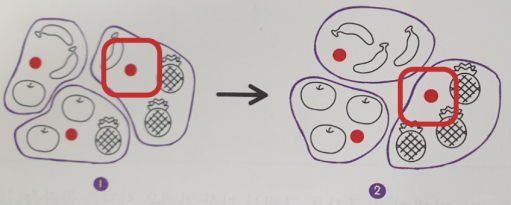



> - 기존의 <font color= #F06E5E>클러스트 중심 및 클러스터
자체</font>가 달라졌음!
- 동일한 과일들로 클러스터 생성 확인			        		

## **k-평균 알고리즘 작동방식 (k=3 가정) 3단계**
1. 클러스터에 속한 샘플의 <font color=#ffeb2a>평균값</font> 계산
2. 평균값으로 중심(빨간점) <font color=#ffeb2a>이동</font>
3. 클러스터 중심을 기준으로 모든 샘플 <font color=#ffeb2a>다시 거리 계산</font>
4. <font color=#ffeb2a>가장 가까운</font> 샘플을 본인의 클러스터로 다시 묶음
5. 클러스터 변동이 <font color=#ffeb2a>***있으면***</font> 2단계 반복
6. 클러스터 변동이 <font color=#ffeb2a>***없으면***</font> 알고리즘 완료

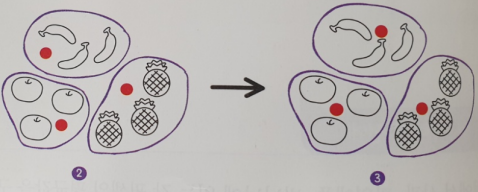

> - 랜덤하게 클러스터 중심 선택 후 점차 가장 가까운 샘플 중심으로 이동하는 간단 알고리즘

---

## **과일 사진 데이터 준비**

- 이전 페이지와 <font color=#ffeb2a>동일한 데이터</font> 사용
- 과일 데이터: <font color=#ffeb2a>사과, 바나나, 파인애플</font>을 담고있는 <font color=#ffeb2a>흑백 사진</font>
- 넘파이 배열의 기본 저장 포맷인 <font color=#ffeb2a>npy</font>로 저장
- 인터넷에서 불러온 후 구글 드라이브에 fruits_300.npy로 저장

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-08-29 05:11:21--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-08-29 05:11:21--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-08-29 05:11:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

## **손코딩**

- 넘파이 <font color=#ffeb2a>np.load</font>() 함수로 파일을 읽어 넘파이 배열 준비
- k-평균 모델 훈련을 위해 (샘플 개수, 너비, 높이) 3차원 배열을 
  
  → <font color=#ffeb2a>reshape</font>() 함수 이용해 (샘플 개수, 너비x높이) <font color=#ffeb2a>2차원 배열</font>로 변경

In [3]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

> k-평균 군집 알고리즘은 <font color= #F06E5E>**2차원 배열**</font>만 사용 가능

---

## **손코딩**

- k-평균 알고리즘은 <font color=#ffeb2a>sklearn.cluster</font> 모듈 아래 <font color=#ffeb2a>KMeans 클래스</font>에 구현
- <font color=#ffeb2a>n_cluseters</font> 매개변수: 클러스터 개수 설정

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

> - 클러스터 수 3으로 지정
- <font color= #F06E5E>비지도 학습</font>이므로 fit() 메서드에서 타깃 데이터 사용하지 않음

---

- 군집된 결과는 KMeans 클래스 객체의 <font color=#ffeb2a>labels_</font> 속성에 저장
- labels 배열의 길이는 <font color=#ffeb2a>샘플 개수</font>과 같음
  → 각 샘플이 어떤 레이블에 해당되는지 나타냄

- n_clusters=3 이므로 labels_ 배열의 값은 <font color=#ffeb2a>0, 1, 2, 중 하나</font>

In [8]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


> - 레아블값 0, 1, 2
- 레이블 <font color= #F06E5E>순서간 의미 없음</font>

In [9]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


> - 0 레이블: 91개
- 1 레이블: 98개
- 2 레이블: 111개

## **클러스터 이미지 시각화**

- <font color=#ffeb2a>draw_fruits</font>() 함수 생성
  - (샘플 개수, 너비, 높이)의 3차원 배열 → <font color=#ffeb2a>가로로 10개씩</font> 이미지 출력
  - <font color=#ffeb2a>샘플 개수에 따라</font> 행과 열의 개수 계산 후 figsize 지정
  - figsize는 <font color=#ffeb2a>ratio</font> 매개변수에 비례하여 커짐(기본값 1로 지정)

- <font color=#ffeb2a>2중 for문</font> 사용(행, 열)
  - 첫 번째 행을 따라 <font color=#ffeb2a>가로</font>로 이미지 그림
  - 그 다음 두번째 행 등 반복

***<font color=#ffeb2a>draw_fruits</font>***()함수 생성

In [26]:
# import numpy.core.fromnumeric import squeeze
import matplotlib.pyplot as plt


def draw_fruits(arr, ratio =1):
  n = len(arr)  # 샘플 개수
                # 한 줄에 10개씩 이미지를 그린다
                # 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열 개수는 샘플 개수, 그렇지 않으면 10개입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:  # n개까지만 그립니다.
        axs[i, j].imshow(arr[i*10+j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()


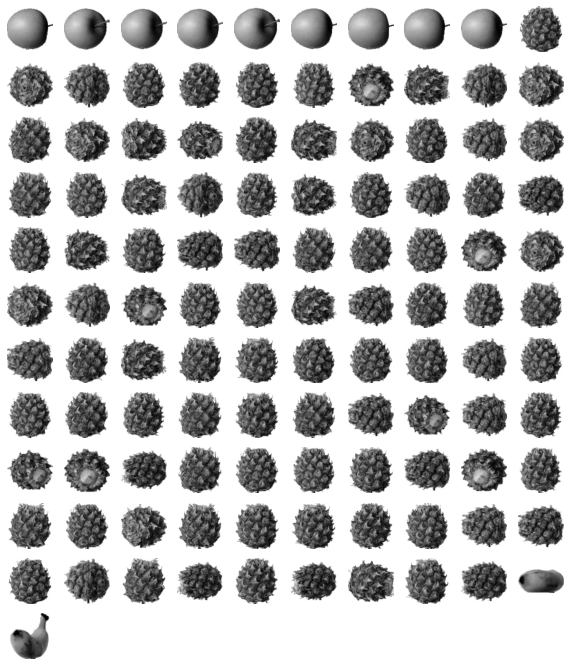

In [27]:
draw_fruits(fruits[km.labels_==0])

- 레이블이 0인 과일 사진
- <font color=#ffeb2a>km.labels_ == 0</font>

  ▶ km.labels_ 배열에서 값이 0인 위치만 True

- <font color=#ffeb2a>불리언 인덱싱</font>: 넘파이는 불리언 배열을 사용해 원소 선택 가능

> - 각 모델마다 다른 종류가 나올 수 있음
- 파인애플에 사과 9개, 바나나 2개 섞여있음

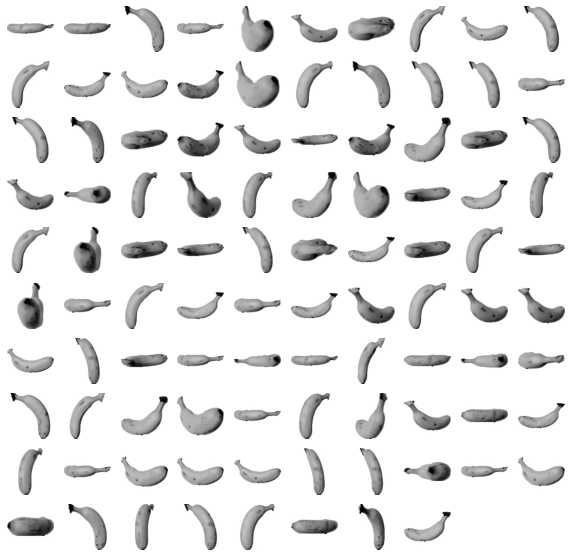

In [28]:
draw_fruits(fruits[km.labels_==1])

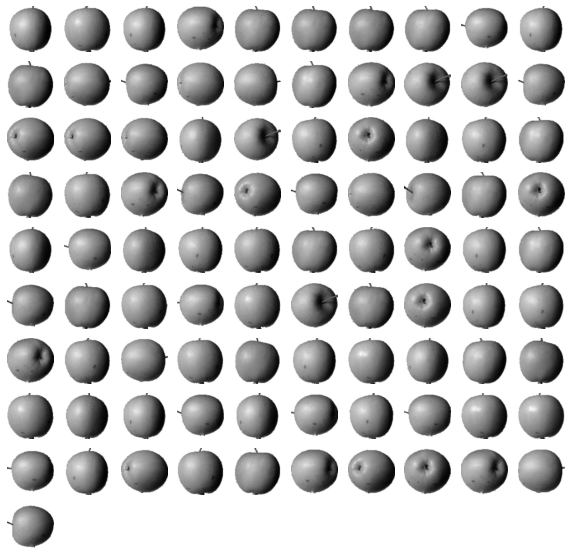

In [29]:
draw_fruits(fruits[km.labels_==2])

> - label 1은 <font color= #F06E5E>모두</font> 바나나, label 2는 <font color= #F06E5E>모두</font> 사과
- 완벽하게 구별해내지는 못함
- 하지만 타깃 레이블 제공하지 않았음에도 <font color= #F06E5E>스스로 비슷한 샘플들 잘 모았음</font>

## **클러스터 중심**
- <font color=#ffeb2a>cluster_centers_</font> 속성

  : KMeans 클래스가 <font color=#ffeb2a>최종적으로</font> 찾은 클러스터 중심

- 100x100 크기의 <font color=#ffeb2a>2차원 배열</font>로 변경 후 이미지 출력

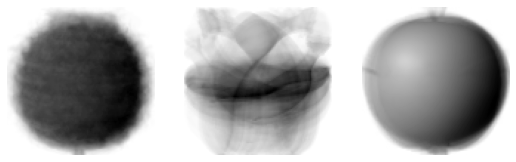

In [31]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

> 이전 프로젝트에서 바나나, 파인애플, 사과 픽셀 평균값 출력한 것과 배우 비슷

---

## **최적의 k찾기**

- 타깃값을 사용하지는 않았지만, <font color=#ffeb2a>클러스터 개수</font>(n_clusters)를 3으로 지정

    ▶ 타깃에 대한 정보를 활용한 셈
- 실전에서는 클러스터 개수조차 <font color=#ffeb2a>알 수 없음</font>
- 어떻게 지정?

- <font color=#ffeb2a>**최적의**</font> 클러스터 개수 k는 얼마?
- <font color=#ff0000>엘보우</font>(elbow) 방법: 적절한 클러스터 개수를 찾기 위한 대표적 방법

## **엘보우 방법**

- <font color=#ffeb2a>이너셔</font>(inertia)
  - 클러스터 중심과 클러스터에 속한 샘플 사이 거리의 제곱합
  - 클러스터에 속한 샘플이 <font color=#ffeb2a>얼마나 가깝게 있는지</font>를 나타내는 값
  - 클러스터 <font color=#ffeb2a>개수가 늘어나면</font> 클러스터 <font color=#ffeb2a>개개의 크기는 줄어듬</font>

    ▶ 이너셔도 줄어듬
- <font color=#ffeb2a>엘보우 방법</font>: 클러스터 개수를 늘려가면서 <font color=#ffeb2a>이너셔의 변화를 관찰</font>하여 최적의 클러스터 개수를 찾는 방법

- 클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 <font color=#ffeb2a>감소하는 속도가 꺾이는 지점</font> 존재 → 더 늘려도 밀집된 정도 크게 개선되지 않음

- 이너셔가 <font color=#ffeb2a>크게 줄어들지 않음</font>

  : 최적의 클러스터 개수

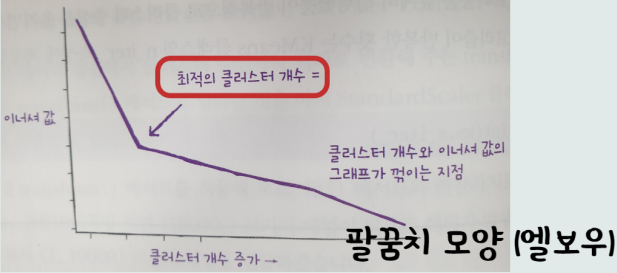

## **손코딩**

- KMeans 클래스는 자동으로 이너셔 계산해서 <font color=#ffeb2a>inerita_ 속성</font>으로 제공
- 클러스터 <font color=#ffeb2a>개수 2~6 바꿔가며</font> 5번 훈련 (fit)
- inertia_ 속성 값을 inertia 리스트 추가 후 <font color=#ffeb2a>그래프</font>로 출력

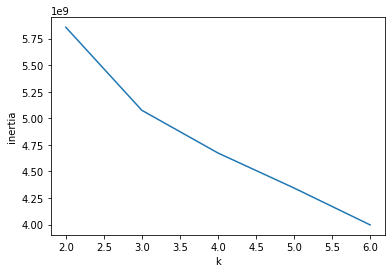

In [35]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## **k-평균 알고리즘의 한계점**

- 클러스터 개수 <font color=#ffeb2a>k값을 입력 파라미터로 지정</font> 필요

- k-means은 k값에 따라 결과값이 완전히 <font color=#ffeb2a>달라짐</font>
  - 예를 들어, 실제 데이터 4개의 클러스터
  - <font color=#ffeb2a>k=3</font>으로 입려했다고 가정
  - 실제 클러스터의 수 보다 k값이 작을 때 발생하는 현상

- 반대로, 실제 클러스터가 5개인데 <font color=#ffeb2a>k=8</font>을 입력
- <font color=#ffeb2a>k값</font>을 어떻게 주느냐에 따라 클러스터링의 결과가 극명하게 달라지며, 좋지 못한 결과
- 제대로 <font color=#ffeb2a>군집이 되지 않음</font>
    (분류, 샘플링 능력이 떨어짐, 수가 다름)

> <font color=#ff0000>엘보우 방법</font>으로 <font color=#ff0000>이너셔</font> 구해서 <font color=#ff0000>K 값 </font>구하기!